# Exploratory Data Analysis

In [1]:
# Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

### 1. Importing 

In [3]:
rawData = pd.read_csv("/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/RedditLarge3.csv")

rawData = rawData[rawData['Flair'].notna()] # Dropping all submissions that don't have a tagged flair
rawData["Body"].fillna("", inplace = True)
rawData["Title"].fillna("", inplace = True)

rawData["text"] = rawData["Title"] + " " + rawData["Body"]

rawData.drop(['Post ID', 'Author', 'Permalink'], axis = 1, inplace=True) 
rawData.rename(columns = {'Flair':'flair'}, inplace = True) 
rawData.head(3)

,Title,Url,Score,Publish Date,Total No. of Comments,flair,Body,text
0,The first draft of NRC or Assam has been relea...,http://nrcdraft.in/NRCDraft/Draft.htm,2,2018-01-01 05:50:41,1,Non-Political,,The first draft of NRC or Assam has been relea...
1,What is the best and the fastest way to Double...,https://www.reddit.com/r/india/comments/7nc7wa...,17,2018-01-01 06:22:46,24,AskIndia,,What is the best and the fastest way to Double...
2,"'Like Jadhav, I Too Couldn't Hug My Mother Bec...",http://www.news18.com/amp/news/india/like-jadh...,65,2018-01-01 07:11:40,32,Politics,,"'Like Jadhav, I Too Couldn't Hug My Mother Bec..."


In [4]:
print("The cleaned data has {} rows and {} columns.".format(rawData.shape[0], rawData.shape[1]))

The cleaned data has 77263 rows and 8 columns.


### 2. Class Imbalance

We check for Class (Flair) Imbalance in the dataset. Lot of submissions with similar flairs and if there are certain flairs with very few rows, it will lead to low accuracy in the classification, so we can elimiate this by two methods: either by getting more data (taken care of in the scraping script) and by considering only popular flairs.

In [5]:
# Get list of all Flair values in the dataframe

flairs = []

column_values = rawData['flair'].values
unique_values =  np.unique(column_values)

for _flair in unique_values:
    flairs.append(_flair)

len(flairs)

173

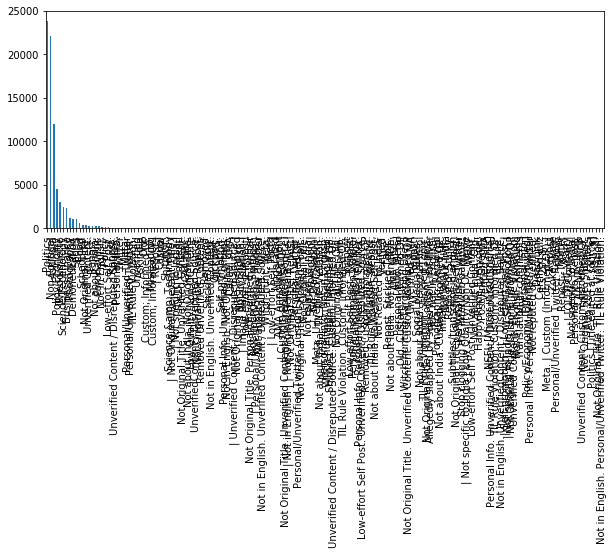

In [6]:
plt.figure(figsize=(10,4))
rawData.flair.value_counts().plot(kind='bar');

The class imbalance is very clear in this plot. So, we keep the top 5 classes (becase they have more than 1000) submissions associated with them.

In [7]:
# Most frequent flairs

flairs = []

for key in rawData.flair.value_counts().head(5).keys():
    flairs.append(key)

rawData = rawData.loc[rawData['flair'].isin(flairs)];

rawData.to_csv('/Users/skhiearth/Desktop/Reddit-Flair-Detection/RedditData/Data/balanced.csv', 
               header=True, index=False) 

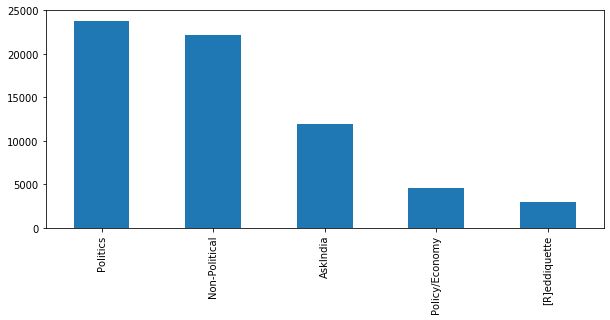

In [8]:
plt.figure(figsize=(10,4))
rawData.flair.value_counts().plot(kind='bar');